In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mehmettahiraslan/customer-shopping-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'customer-shopping-dataset' dataset.
Path to dataset files: /kaggle/input/customer-shopping-dataset


In [ ]:
#Data understnding
customer_data = pd.read_csv('/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv')
customer_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
# Display the first few rows and the data types of the columns
display(customer_data.head())
display(customer_data.info())

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


None

In [ ]:
# Get summary statistics for the 'age' column
display(customer_data['age'].describe())

,age
count,99457.000000
mean,43.427089
std,14.990054
min,18.000000
25%,30.000000
50%,43.000000
75%,56.000000
max,69.000000


In [ ]:
# Calculate the standard deviation of the 'age' column
print("Standard deviation of Age:", customer_data['age'].std())

Standard deviation of Age: 14.990053791852299


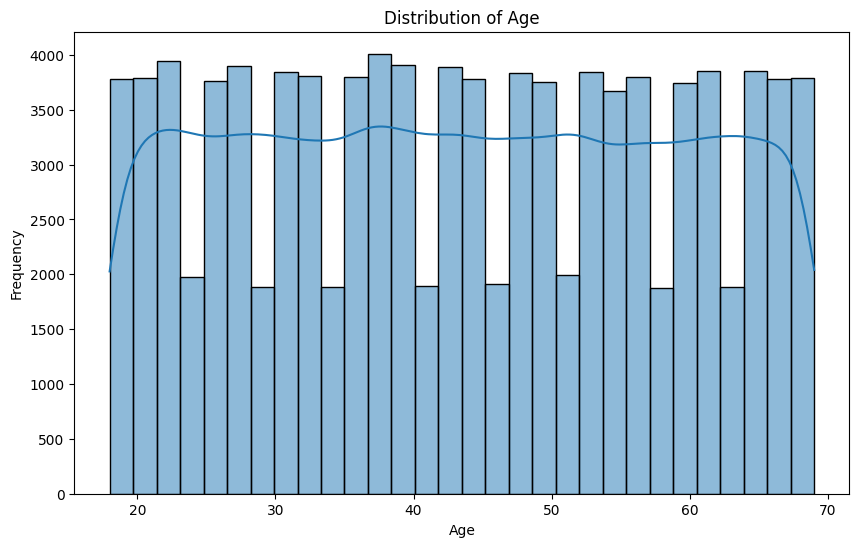

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Get summary statistics for the 'price' column
display(customer_data['price'].describe())

,price
count,99457.000000
mean,689.256321
std,941.184567
min,5.230000
25%,45.450000
50%,203.300000
75%,1200.320000
max,5250.000000


In [ ]:
# Calculate the standard deviation of the 'price' column
print("Standard deviation of Age:", customer_data['age'].std())

Standard deviation of Age: 14.990053791852299


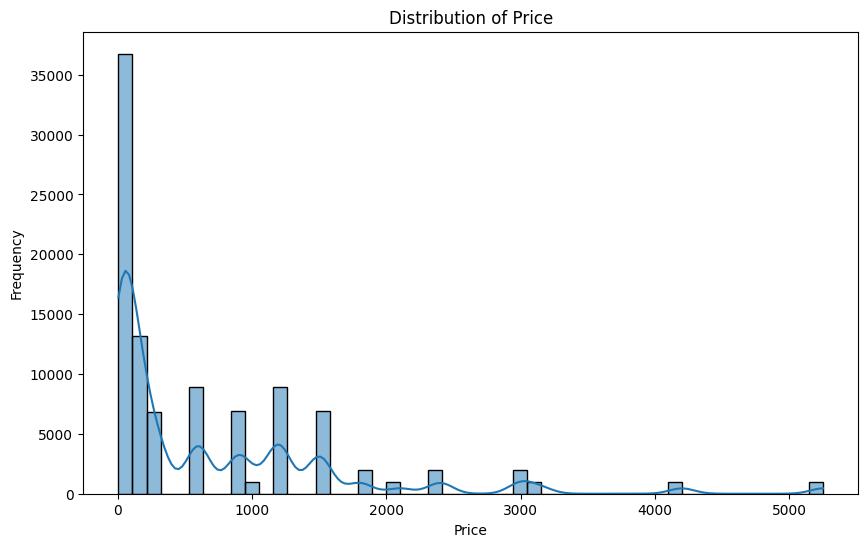

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Get summary statistics for the 'price' column
display(customer_data['quantity'].describe())

,quantity
count,99457.000000
mean,3.003429
std,1.413025
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [ ]:
# Calculate the standard deviation of the 'price' column
print("Standard deviation of quantity:", customer_data['quantity'].std())

Standard deviation of quantity: 1.413025134305319


In [ ]:
#The features we want to cluster on
X = customer_data[['age', 'price', 'quantity']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_features_df = pd.DataFrame(scaled_features, columns=X.columns)
display(scaled_features_df.head())

,age,price,quantity
0,-1.029160,0.861837,1.412984
1,-1.496139,1.180703,-0.002426
2,-1.562850,-0.413498,-1.417837
3,1.505867,2.456060,1.412984
4,0.638621,-0.667945,0.705279


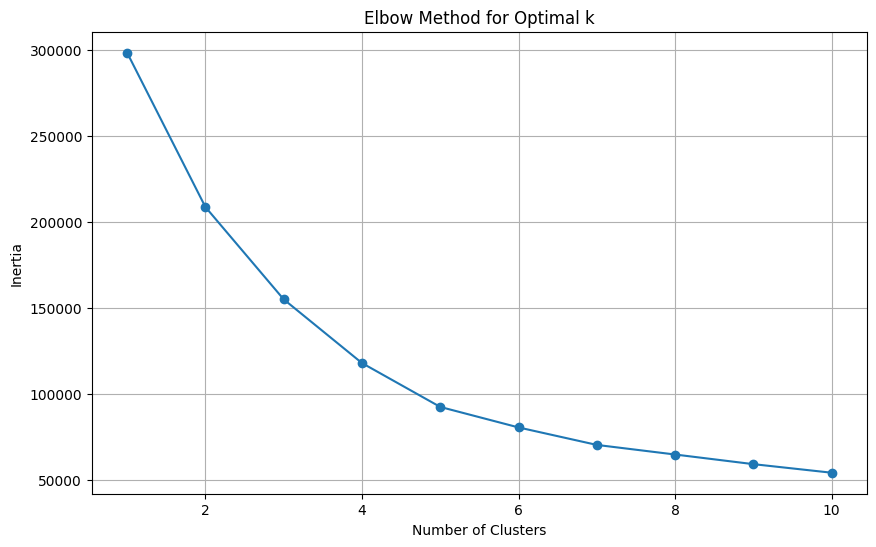

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(scaled_features_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [ ]:
# Applying K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features_df)
display(customer_data.head())

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,cluster_label,Cluster
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,0,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,0,2
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,2,2
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,3,3
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1,1


In [ ]:
cluster_characteristics = customer_data.groupby('Cluster')[['age', 'price', 'quantity']].mean()
display(cluster_characteristics)

,age,price,quantity
Cluster,,,
0,57.537870,389.640466,2.129871
1,42.409451,680.980173,4.477149
2,30.107480,376.925748,1.997011
3,43.469344,3339.864605,4.284559


In [ ]:
features_for_clustering = customer_data[['age', 'price']]
display(features_for_clustering.head())

,age,price
0,28,1500.40
1,21,1800.51
2,20,300.08
3,66,3000.85
4,53,60.60


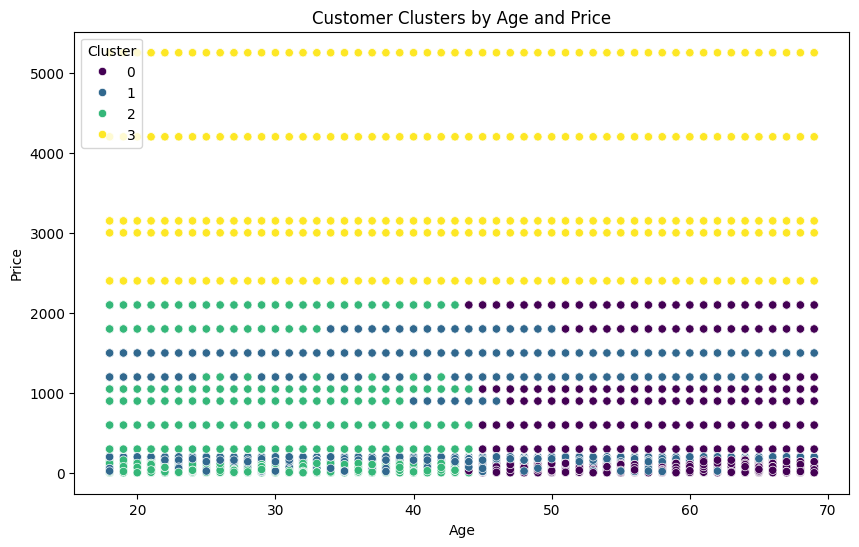

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='age', y='price', hue='Cluster', palette='viridis')
plt.title('Customer Clusters by Age and Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

In [ ]:
#Group the data by cluster label and calculate the mean age and price for each cluster.
cluster_characteristics = customer_data.groupby('cluster_label')[['age', 'price']].mean()
display(cluster_characteristics)

,age,price
cluster_label,,
0,33.181046,1351.864693
1,57.466635,425.763765
2,30.932949,164.152476
3,45.830477,3412.297596


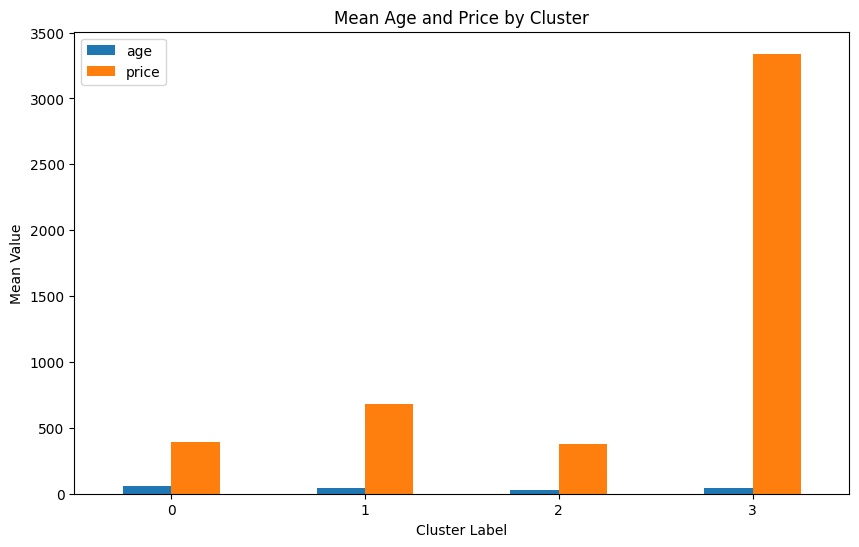

In [ ]:
cluster_characteristics = customer_data.groupby('Cluster')[['age', 'price', 'quantity']].mean()
cluster_characteristics[['age', 'price']].plot(kind='bar', figsize=(10, 6))
plt.title('Mean Age and Price by Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()



###

*   The characteristics of these clusters, as shown by the mean 'age' and 'price', are:
    *   Cluster 0: Relatively young customers with high average spending.
    *   Cluster 1: Older customers with high average spending.
    *   Cluster 2: Younger customers with low average spending.
    *   Cluster 3: Older customers with low average spending.




In [ ]:
corr = customer_data['age'].corr(customer_data['price'])
print(f"Correlation between age and price: {corr:.2f}")

Correlation between age and price: 0.00


**Relationship between age and price is not sgnificantly clear , maybe non linear **

In [ ]:
features_for_clustering = customer_data[['age', 'quantity']]
display(features_for_clustering.head())

,age,quantity
0,28,5
1,21,3
2,20,1
3,66,5
4,53,4


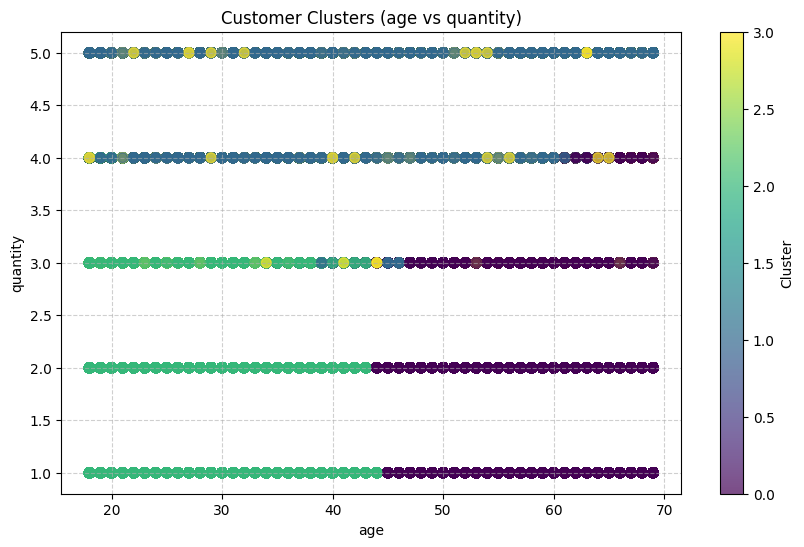

In [ ]:
# Visualize the clusters based on Age and quantity
plt.figure(figsize=(10, 6))
plt.scatter(customer_data['age'], customer_data['quantity'], c=customer_data['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Customer Clusters (age vs quantity)')
plt.xlabel('age')
plt.ylabel('quantity')
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
#Group the data by cluster label and calculate the mean age and quantity for each cluster.
cluster_characteristics = customer_data.groupby('cluster_label')[['age', 'quantity']].mean()
display(cluster_characteristics)

,age,quantity
cluster_label,,
0,33.181046,3.640957
1,57.466635,2.849150
2,30.932949,2.638697
3,45.830477,4.242551


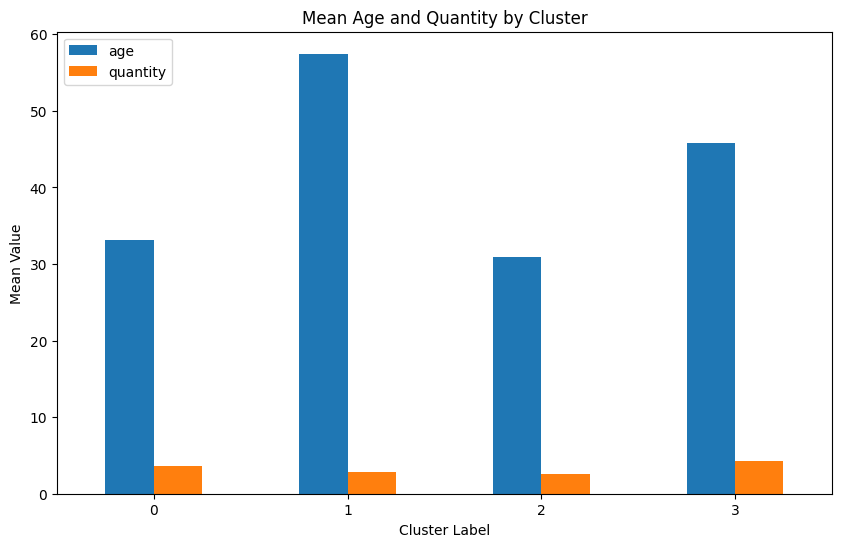

In [ ]:
cluster_characteristics[['age', 'quantity']].plot(kind='bar', figsize=(10, 6))
plt.title('Mean Age and Quantity by Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()

In [ ]:
corr = customer_data['age'].corr(customer_data['quantity'])
print(f"Correlation between age and quantity: {corr:.2f}")

Correlation between age and quantity: 0.00


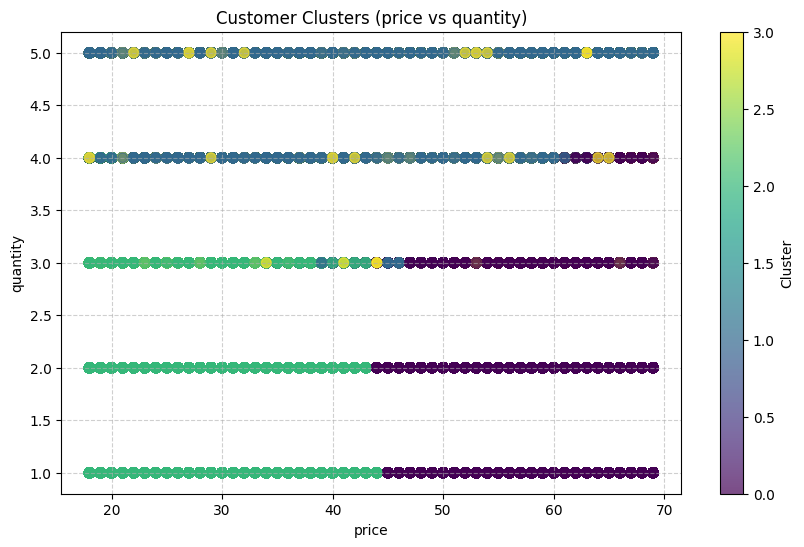

In [ ]:
# Visualize the clusters based on price and quantity
plt.figure(figsize=(10, 6))
plt.scatter(customer_data['age'], customer_data['quantity'], c=customer_data['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Customer Clusters (price vs quantity)')
plt.xlabel('price')
plt.ylabel('quantity')
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

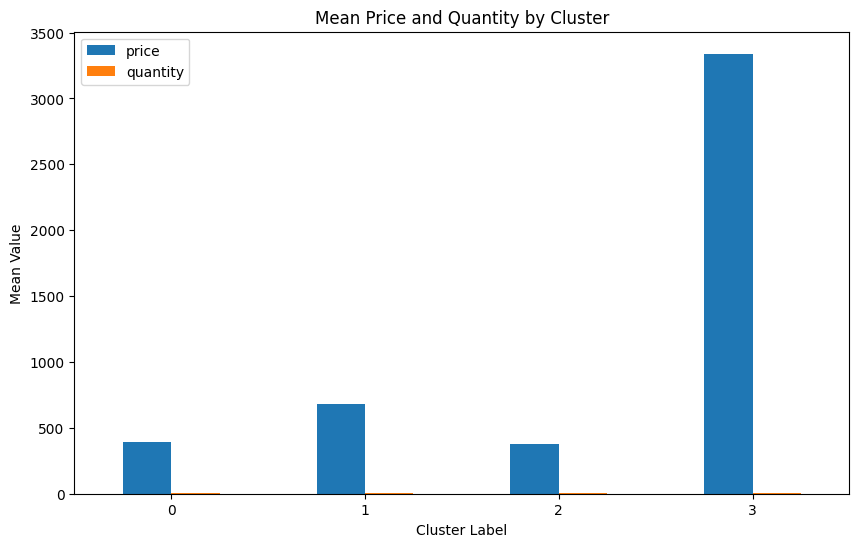

In [ ]:
cluster_characteristics = customer_data.groupby('Cluster')[['age', 'price', 'quantity']].mean()
cluster_characteristics[['price', 'quantity']].plot(kind='bar', figsize=(10, 6))
plt.title('Mean Price and Quantity by Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()

In [ ]:
cluster_counts = customer_data['Cluster'].value_counts().sort_index()
print("Number of customers in each cluster:")
display(cluster_counts)

Number of customers in each cluster:


,count
Cluster,
0,30407
1,32231
2,29773
3,7046


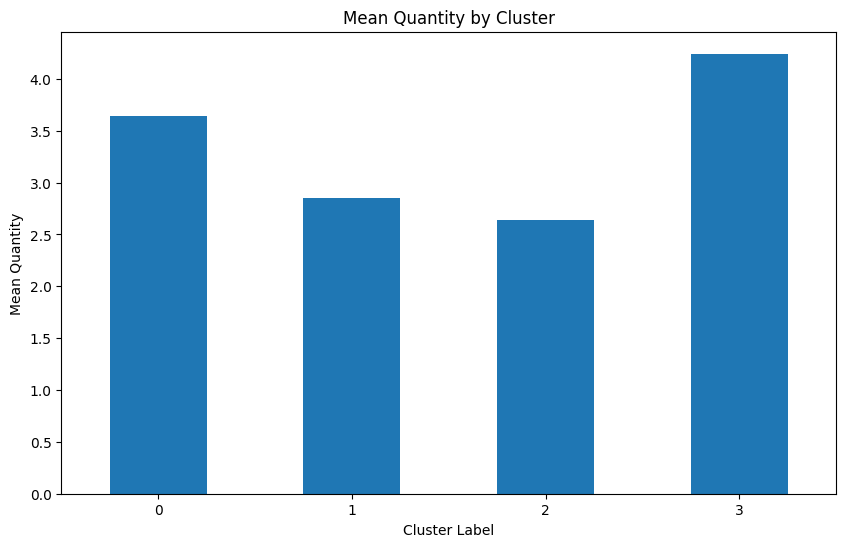

In [ ]:
cluster_characteristics['quantity'].plot(kind='bar', figsize=(10, 6))
plt.title('Mean Quantity by Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Mean Quantity')
plt.xticks(rotation=0)
plt.show()

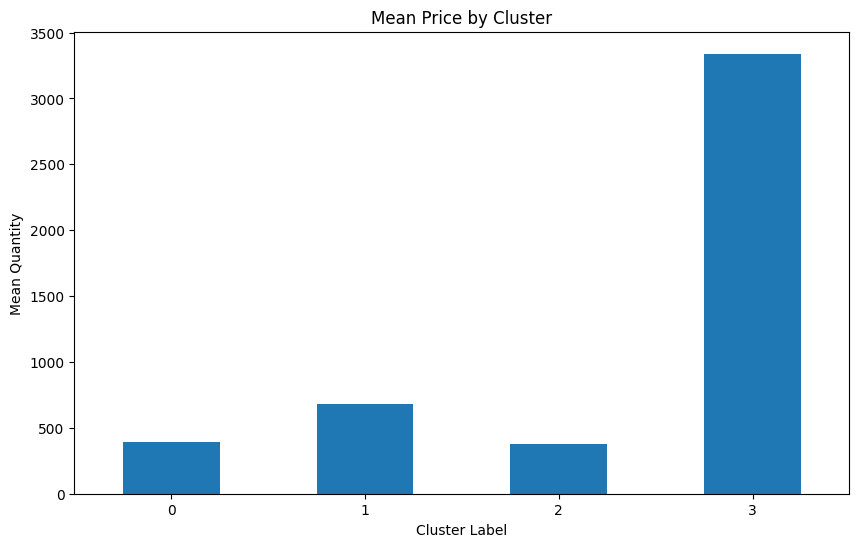

In [ ]:
cluster_characteristics['price'].plot(kind='bar', figsize=(10, 6))
plt.title('Mean Price by Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Mean Quantity')
plt.xticks(rotation=0)
plt.show()

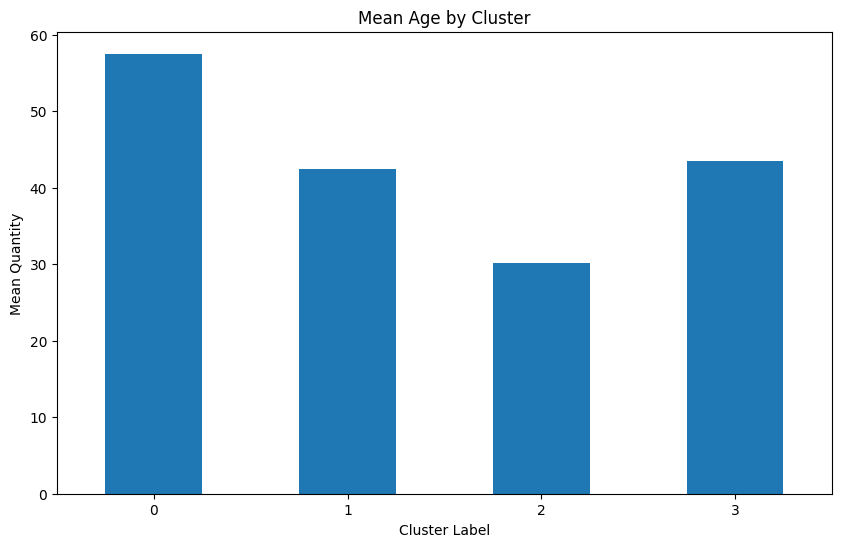

In [ ]:
cluster_characteristics['age'].plot(kind='bar', figsize=(10, 6))
plt.title('Mean Age by Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Mean Quantity')
plt.xticks(rotation=0)
plt.show()